## Data exploration notebook
This notebook uses cleanvision from cleanlab to find issues in the CUB-200-2011 bird images dataset. In addition, problematic samples are written to a .csv file such that these can be filtered out during preprocessing.

In [ ]:
!pip install git+https://github.com/cleanlab/cleanvision.git

In [1]:
# Imports
from cleanvision.imagelab import Imagelab
import os
import numpy as np
from numpy import genfromtxt

In [ ]:
# Find issues in the whole dataset
# Directory where all images are stored
rootdir = './data/CUB_200_2011/images/merge_folder'
# Find issues with imagelab
imagelab = Imagelab(data_path=rootdir)
imagelab.find_issues()


In [5]:
# Summarize issues found
imagelab.issue_summary

,issue_type,num_images
0,blurry,15
1,near_duplicates,10
2,grayscale,8
3,low_information,3
4,exact_duplicates,2
5,light,1
6,odd_aspect_ratio,1
7,dark,0


In [ ]:
# Visualize some near duplicates
near_dup_images = imagelab.issues[imagelab.issues["is_blurry"] == True]
near_dup_image_files = near_dup_images.index.tolist()
print(near_dup_image_files)
imagelab.visualize(image_files=near_dup_image_files)

In [ ]:
# Get lists of exact and near duplicate sets
exact_dups_list = imagelab.info['exact_duplicates']['sets']
near_dups_list = imagelab.info['near_duplicates']['sets']
# Concatenate the lists
samples_list = exact_dups_list + near_dups_list
print(samples_list)
print(samples_list[0][0])
print(exact_dups_list[0][0])

In [43]:
def problematic_samples_tocsv(samples_list : list) -> None:
    """
    Gets the first problematic samples from the sample list and writes the file names to a csv file.

    Parameters
    -----------
        sample_list : list
            List containing sets of problematic samples.
    """
    problematic_samples = []
    for i in range(len(samples_list)):
        path = samples_list[i][0]
        head_tail = os.path.split(path)
        tail = head_tail[1]
        problematic_samples.append(tail)

    np.savetxt("problematic_samples.csv", problematic_samples, delimiter=",", fmt ='% s')
    print(problematic_samples)
    print(len(problematic_samples))


In [44]:
problematic_samples_tocsv(samples_list=samples_list)

['Pigeon_Guillemot_0018_40195.jpg', 'Bronzed_Cowbird_0025_796213.jpg', 'Chuck_Will_Widow_0042_796983.jpg', 'Red_Legged_Kittiwake_0020_795439.jpg', 'Summer_Tanager_0047_140164.jpg', 'Swainson_Warbler_0022_794868.jpg']
6


In [45]:
# Load problematic samples from csv
laoded_problematic_samples = np.loadtxt('problematic_samples.csv', delimiter=',', dtype=str )
print(laoded_problematic_samples)

['Pigeon_Guillemot_0018_40195.jpg' 'Bronzed_Cowbird_0025_796213.jpg'
 'Chuck_Will_Widow_0042_796983.jpg' 'Red_Legged_Kittiwake_0020_795439.jpg'
 'Summer_Tanager_0047_140164.jpg' 'Swainson_Warbler_0022_794868.jpg']


In [60]:

# Test code for crop_imgages.py
# To filter out the problematic samples

boxes = open("./data/CUB_200_2011/bounding_boxes.txt")
images_id = open("./data/CUB_200_2011/images.txt")
train_test = open("C./data/CUB_200_2011/train_test_split.txt")



for (line, box, train) in zip(images_id, boxes, train_test):
    i = 0
    image_path = line.split()[1]
    image_name = image_path.split("/")[1]
    is_train = int(train.split()[1])

    if is_train and not(image_name in laoded_problematic_samples):
        i+=1
    elif not (is_train) and not(image_name in laoded_problematic_samples):
        i+=2
    else: 
        print("problematic samples skipped in train test split: ", image_name)


problematic samples skipped in train test split:  Chuck_Will_Widow_0042_796983.jpg
problematic samples skipped in train test split:  Bronzed_Cowbird_0025_796213.jpg
problematic samples skipped in train test split:  Pigeon_Guillemot_0018_40195.jpg
problematic samples skipped in train test split:  Red_Legged_Kittiwake_0020_795439.jpg
problematic samples skipped in train test split:  Summer_Tanager_0047_140164.jpg
problematic samples skipped in train test split:  Swainson_Warbler_0022_794868.jpg


## General data exploration
- number of images
- distribution of images 

In [2]:
import os
import matplotlib.pyplot as plt

In [14]:
def count_files_per_subfolder(folder_path):
    file_count_per_subfolder = {}

    for root, _, files in os.walk(folder_path):
        subfolder_name = os.path.relpath(root, folder_path)
        if ".amlignore" in files:
            file_count_per_subfolder[subfolder_name] = len(files) -2
        else:
            file_count_per_subfolder[subfolder_name] = len(files) 


    return file_count_per_subfolder

folder_name = 'train_push10'

folder_path = './data/CUB_200_2011/datasets/cub200_cropped/{}'.format(folder_name)
files_per_subfolder = count_files_per_subfolder(folder_path)
if files_per_subfolder:
    first_key = next(iter(files_per_subfolder))
    files_per_subfolder.pop(first_key)
print("Number of files per subfolder in {}:".format(folder_name))
for subfolder, file_count in files_per_subfolder.items():
    print(f"{subfolder}: {file_count} files")


names = list(files_per_subfolder.keys())
counts = list(files_per_subfolder.values())



Number of files per subfolder in train_push10:
001.Black_footed_Albatross: 30 files
002.Laysan_Albatross: 30 files
003.Sooty_Albatross: 30 files
004.Groove_billed_Ani: 30 files
005.Crested_Auklet: 30 files
006.Least_Auklet: 30 files
007.Parakeet_Auklet: 30 files
008.Rhinoceros_Auklet: 30 files
009.Brewer_Blackbird: 30 files
010.Red_winged_Blackbird: 30 files
011.Rusty_Blackbird: 30 files
012.Yellow_headed_Blackbird: 30 files
013.Bobolink: 30 files
014.Indigo_Bunting: 30 files
015.Lazuli_Bunting: 30 files
016.Painted_Bunting: 30 files
017.Cardinal: 30 files
018.Spotted_Catbird: 30 files
019.Gray_Catbird: 30 files
020.Yellow_breasted_Chat: 30 files


In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=18)

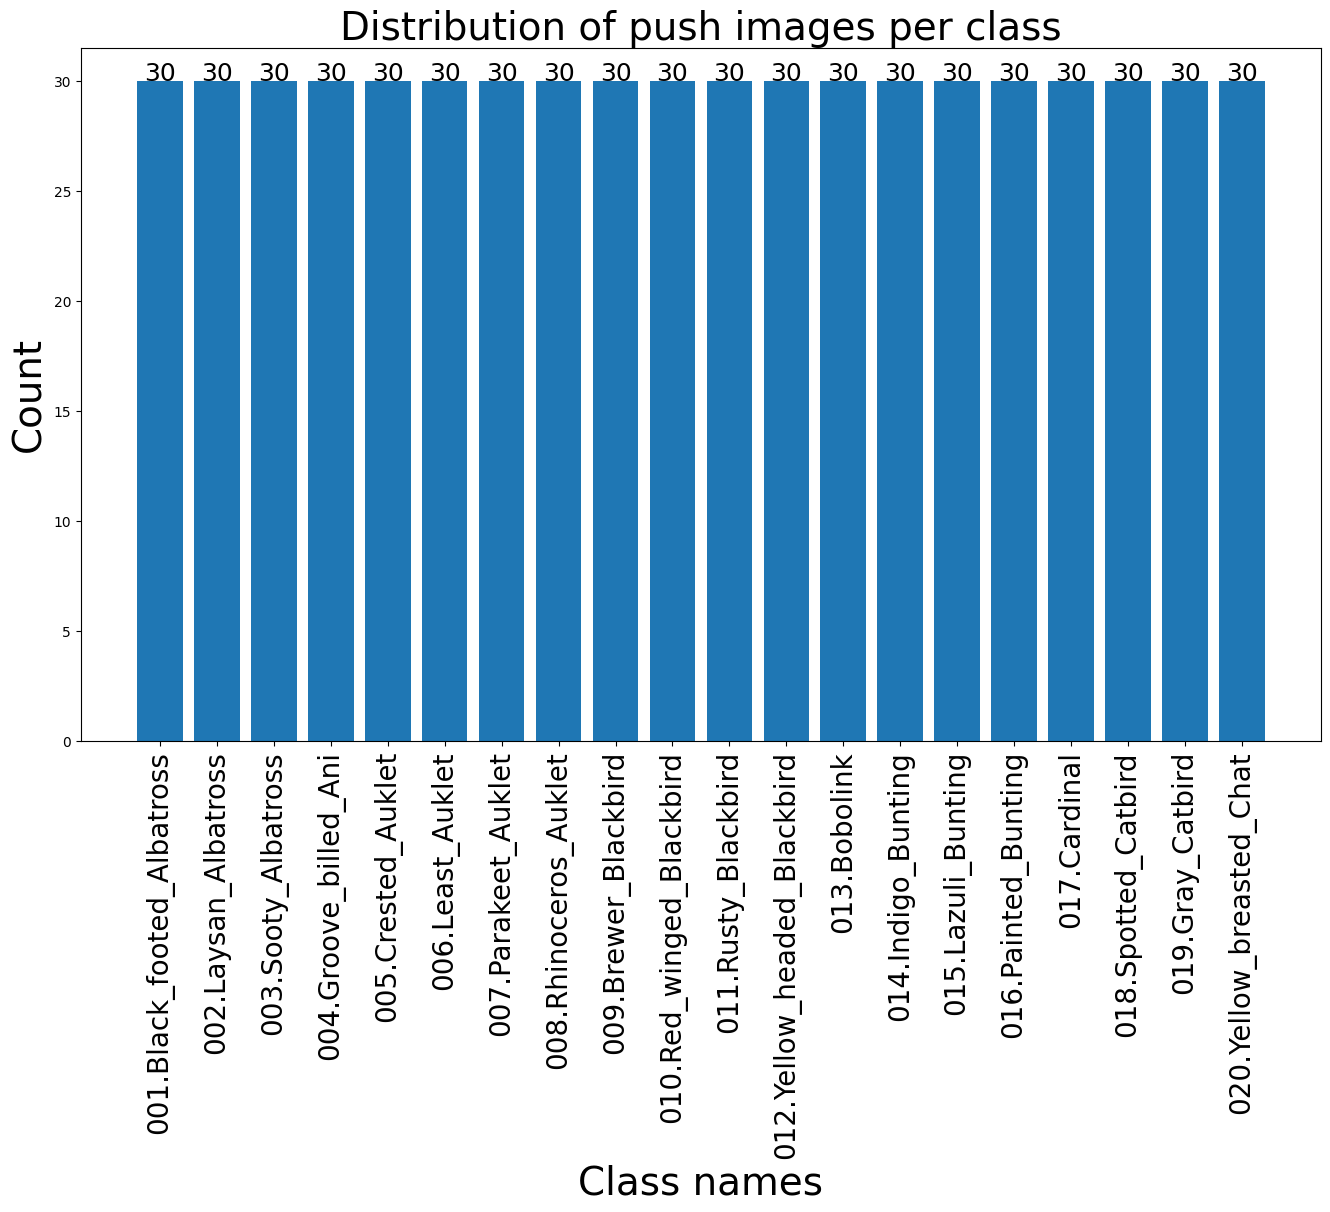

In [15]:
fig, ax = plt.subplots(figsize =(16, 9))
plt.bar(names,counts)
plt.xticks( names, rotation=90, fontsize=20)
addlabels(names, counts)
plt.xlabel("Class names", fontsize=28)
plt.ylabel("Count", fontsize=28)
plt.title('Distribution of push images per class', fontsize = 28)


plt.savefig("barplot_{}_dist.pdf".format(folder_name), bbox_inches='tight')




In [51]:
def count_files_in_subfolders(folder_path):
    file_count = 0

    for root, _, files in os.walk(folder_path):
        if ".amlignore" in files:
             file_count +=  len(files) -2
        else:
            file_count += len(files)


    return file_count

# Example usage:
folder_path = './data/CUB_200_2011/datasets/cub200_cropped/train_push10'
total_files = count_files_in_subfolders(folder_path)
print("Total files in all subfolders:", total_files)

Total files in all subfolders: 600


In [52]:
def count_files_in_first_n_subfolders(folder_path, n):
    file_count = 0
    subfolder_count = 0

    for root, _, files in os.walk(folder_path):
        if subfolder_count >= n:
            break
        if ".amlignore" in files:
             file_count +=  len(files) -2
        else:
            file_count += len(files)
        subfolder_count += 1

    return file_count

# Example usage:
folder_path = './data/CUB_200_2011/images'
n = 20
total_files = count_files_in_first_n_subfolders(folder_path, n)
print("Total files in the first", n, "subfolders:", total_files)

Total files in the first 20 subfolders: 1056
